In [1]:
import pandas as pd #for importing and using data from the imported csv file

In [2]:
from matplotlib import pyplot as plt #for creating charts

In [3]:
import numpy as np #for linear calculations

In [4]:
import seaborn as sns

In [5]:
from matplotlib import rcParams

In [6]:
#climate change data is analyses from here:

In [7]:
#import data from csv file
climate_data = pd.read_csv('climate_data.csv')

In [8]:
#read the imported data
climate_data.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [9]:
#check if there are null values present
climate_data.isnull().sum()

Region                  0
Country                 0
State             1048575
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [10]:
#the only column that contains null values is 'State'
#it only contains null values so the data is not useful for this analysis
#the entire column will be dropped for presentation and clarity purposes
climate_data=climate_data.dropna(axis=1,how='all')

In [11]:
#checking if the correct column was removed
climate_data.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9


In [12]:
#checking exactly how many rows correspond to each year
climate_data['Year'].value_counts()

2000    43920
1998    43892
1999    43842
2001    43800
2002    43800
2003    43585
1996    43554
1997    43466
1995    43431
2004    42962
2005    42705
2006    42457
2010    41387
2011    41154
2007    40965
2008    40608
2009    40152
2012    39527
2013    38902
2015    38429
2016    38429
2014    38351
2017    38326
2018    38302
2019    38298
2020    13920
201       322
200        89
Name: Year, dtype: int64

In [13]:
#there are some values for Year 200 and 201 which need to be removed as the values do not represent a distinct year so the data cannot be used
#Year 2020 will also be removed as it does not contain data for the full year and will not result in accurate insights
climate_data=climate_data.drop(climate_data[(climate_data['Year']==2020) | 
                                            (climate_data['Year']==201) | (climate_data['Year']==200)].index)

In [14]:
#checking if the Year values 200, 201, and 2020 were removed 
climate_data['Year'].value_counts()

2000    43920
1998    43892
1999    43842
2001    43800
2002    43800
2003    43585
1996    43554
1997    43466
1995    43431
2004    42962
2005    42705
2006    42457
2010    41387
2011    41154
2007    40965
2008    40608
2009    40152
2012    39527
2013    38902
2015    38429
2016    38429
2014    38351
2017    38326
2018    38302
2019    38298
Name: Year, dtype: int64

In [15]:
#removing the average temperature values that equal to -99
climate_data=climate_data.drop(climate_data[(climate_data['AvgTemperature']==-99)].index)

In [16]:
#deleting year 2019 and 2018 to fit with the time period of the other data set
climate_data=climate_data.drop(climate_data[(climate_data['Year']==2019) | (climate_data['Year']==2018)].index)

In [17]:
climate_data['Year'].value_counts()

2001    40303
2005    40227
2011    40135
2010    40050
2004    39999
2006    39967
2003    39804
2007    39717
2002    39683
1996    39538
2000    39501
2008    39477
2009    39408
1999    39282
1995    39103
1997    39071
2012    39035
2013    38589
1998    38353
2017    38116
2015    38011
2014    37982
2016    37926
Name: Year, dtype: int64

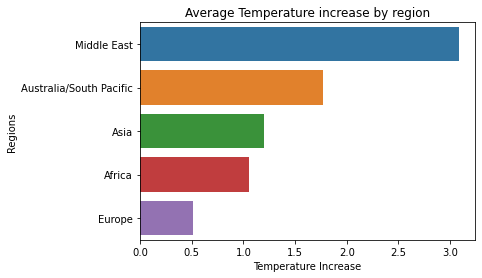

In [289]:
# SRK 
# https://www.kaggle.com/kaunal11/global-warming-analysis/notebook?select=city_temperature.csv
# the graph below has a different timeline and different regions to the one found at the above link 

# checking how much the average temperature of each region increased between 1995 to 2017
mean_temp={}
keys=climate_data['Region'].unique()
for regions in climate_data.Region.unique():
    mean_temp[regions]=climate_data[(climate_data['Region']==regions)&(climate_data['Year']==2017)]['AvgTemperature'].mean()-climate_data[(climate_data['Region']==regions)&(climate_data['Year']==1995)]['AvgTemperature'].mean()
mean_temp_change=pd.DataFrame(list(mean_temp.items()),columns=['Regions','Temperature Increase'])

sns.barplot(y='Regions', x='Temperature Increase', data=mean_temp_change.sort_values(by='Temperature Increase', ascending=False))
plt.title('Average Temperature increase by region')
plt.savefig('3Fincrease.png', bbox_inches="tight")

Text(101.625, 0.5, 'Temperature')

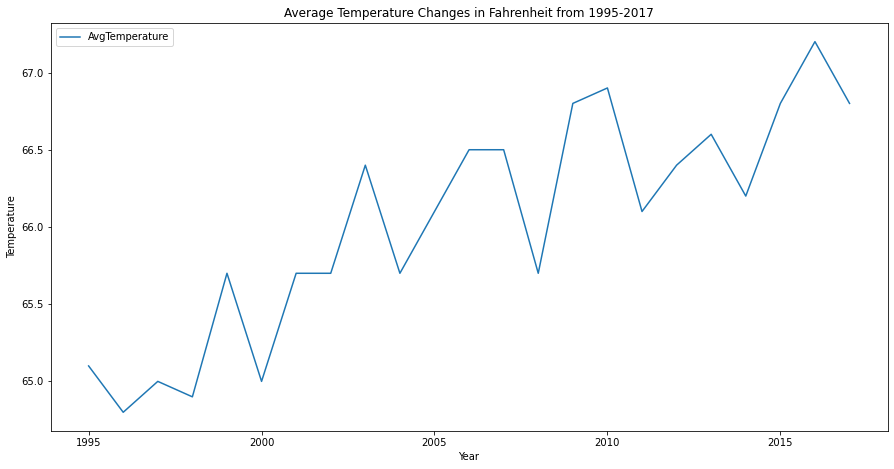

In [290]:
# average temperature in fahrenheit changes from 1995 to 2017 worldwide
climate_data[['Year','AvgTemperature']].groupby(["Year"]).median().sort_values(by='Year',ascending=False).plot(figsize=(15,7.5))
plt.title("Average Temperature Changes in Fahrenheit from 1995-2017")
plt.savefig('avgtemp95-17.png', bbox_inches="tight")
plt.xlabel("Year")
plt.ylabel("Temperature")

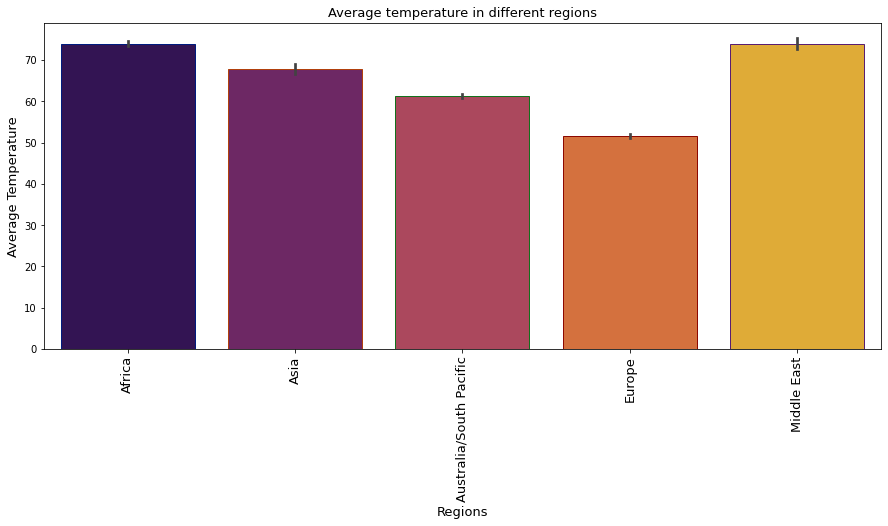

In [304]:
plt.subplots(figsize=(15,6))
sns.barplot(x='Region',y='AvgTemperature',data=data_merge_df,palette='inferno',edgecolor=sns.color_palette('dark',7))
plt.ylabel('Average Temperature', fontsize=13)
plt.xticks(rotation=90,fontsize=13)
plt.xlabel('Regions', fontsize=13)
plt.title('Average temperature in different regions', fontsize=13)
plt.savefig('avgtempbar.png', bbox_inches="tight")

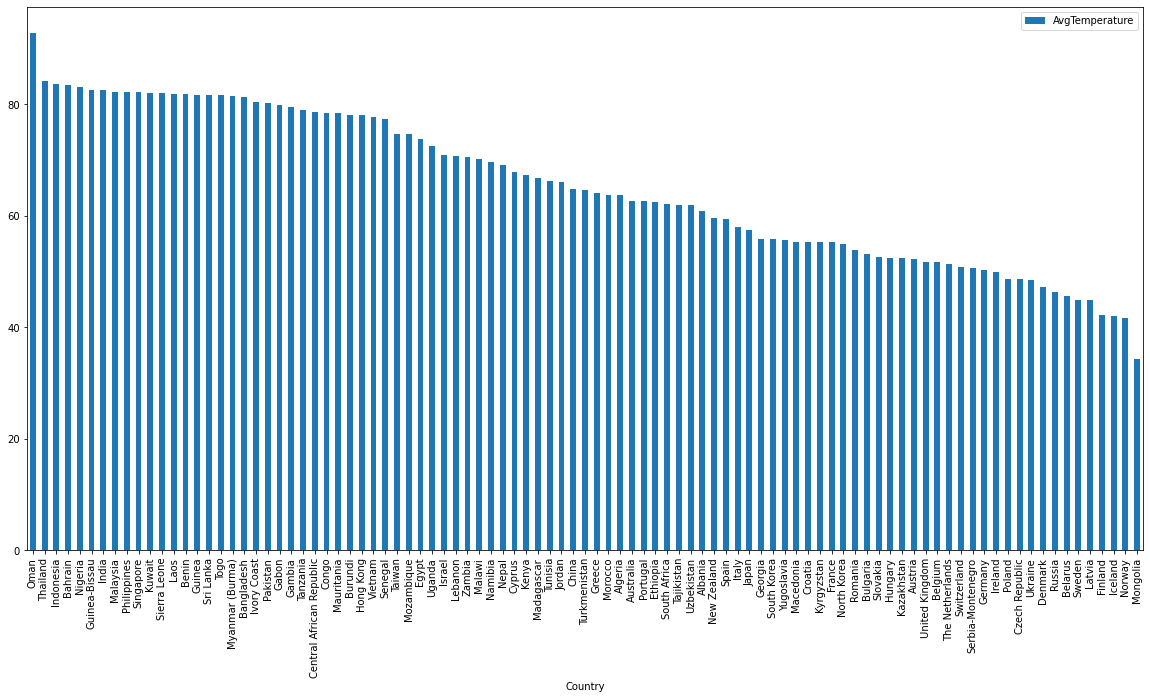

In [303]:
#Average temperature changes for each country
climate_data[['AvgTemperature', 'Country']].groupby(['Country']
                                                   ).median().sort_values("AvgTemperature", 
                                                                          ascending = False).plot.bar(figsize=(20,10))
plt.savefig('avgtempcountry.png', bbox_inches="tight")

In [ ]:
#the air pollution data is analysed from here:

In [23]:
#loading in the air pollution deaths csv file
air_pollution = pd.read_csv('air_pollution_deaths.csv')

In [24]:
air_pollution.head()

,Entity,Code,Year,Death rate Under-5s,Death rate 5-14 years,Death rate 15-49 years,Death rate 50-69 years,Death rate 70+ years
0,Afghanistan,AFG,1990,96.92,1.02,7.93,103.46,337.54
1,Afghanistan,AFG,1991,89.61,1.00,7.59,105.10,340.86
2,Afghanistan,AFG,1992,73.52,0.97,6.55,105.57,341.70
3,Afghanistan,AFG,1993,73.39,1.02,5.92,107.05,344.31
4,Afghanistan,AFG,1994,77.07,1.05,5.87,108.68,346.62


In [25]:
#checking for the amount of null values 
air_pollution.isnull().sum()

Entity                      0
Code                      979
Year                        0
Death rate Under-5s         0
Death rate 5-14 years       0
Death rate 15-49 years      0
Death rate 50-69 years      0
Death rate 70+ years        0
dtype: int64

In [26]:
# checking for the number of `records in each year 
air_pollution['Year'].value_counts()

2015    231
2011    231
1996    231
2000    231
2004    231
2008    231
2012    231
2016    231
1993    231
1997    231
2001    231
2005    231
2009    231
2013    231
1992    231
1990    231
1994    231
1998    231
2002    231
2006    231
2010    231
2014    231
1991    231
1995    231
1999    231
2003    231
2007    231
2017    230
Name: Year, dtype: int64

In [27]:
#removing the years records from 1990, 1991, 1992, 1993, 1994 to match the years in the other dataset
air_pollution=air_pollution.drop(air_pollution[(air_pollution['Year']==1990)|
                                            (air_pollution['Year']==1991)|
                                            (air_pollution['Year']==1992)|
                                            (air_pollution['Year']==1993)|
                               (air_pollution['Year']==1994)].index)

In [28]:
# cheking if the right years were deleted
air_pollution['Year'].value_counts()

2015    231
2013    231
2000    231
2004    231
2008    231
2012    231
2016    231
1997    231
2001    231
2005    231
2009    231
1996    231
2011    231
1998    231
2002    231
2006    231
2010    231
2014    231
1995    231
1999    231
2003    231
2007    231
2017    230
Name: Year, dtype: int64

In [29]:
#delete the code column
del air_pollution['Code']

In [30]:
#checking if the code column was removed
air_pollution.head()

,Entity,Year,Death rate Under-5s,Death rate 5-14 years,Death rate 15-49 years,Death rate 50-69 years,Death rate 70+ years
5,Afghanistan,1995,73.72,1.06,5.71,108.56,344.07
6,Afghanistan,1996,68.73,1.03,5.74,109.31,345.10
7,Afghanistan,1997,65.57,1.02,5.86,110.34,346.52
8,Afghanistan,1998,61.70,0.99,5.91,109.56,341.70
9,Afghanistan,1999,61.14,0.98,6.29,111.00,343.64


In [31]:
#renaming columns 
air_pollution = air_pollution.rename(columns={'Death rate Under-5s': 'Deaths 5- yrs', 
                                              'Entity': 'Country', 
                                              'Death rate 5-14 years': 'Deaths 5-14 yrs', 
                                              'Death rate 15-49 years': 'Deaths 15-49 yrs', 
                                              'Death rate 50-69 years': 'Deaths 50-69 yrs', 
                                              'Death rate 70+ years': 'Deaths 70+ yrs'})

In [32]:
# checking to see if the comuns were remaned
air_pollution.head()

,Country,Year,Deaths 5- yrs,Deaths 5-14 yrs,Deaths 15-49 yrs,Deaths 50-69 yrs,Deaths 70+ yrs
5,Afghanistan,1995,73.72,1.06,5.71,108.56,344.07
6,Afghanistan,1996,68.73,1.03,5.74,109.31,345.10
7,Afghanistan,1997,65.57,1.02,5.86,110.34,346.52
8,Afghanistan,1998,61.70,0.99,5.91,109.56,341.70
9,Afghanistan,1999,61.14,0.98,6.29,111.00,343.64


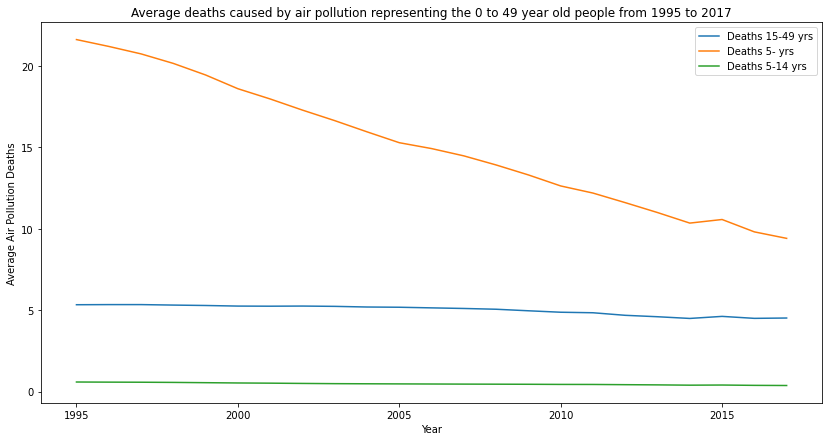

In [305]:
# plotting the air pollution death age groups (without the last two columns Deaths 50-69 yrs and 70+ yrs)
pd.pivot_table(air_pollution,index=['Year'],values=['Deaths 5- yrs', 
                                                    'Deaths 5-14 yrs', 
                                                    'Deaths 15-49 yrs'],aggfunc=np.mean).plot(figsize=(14,7))
plt.title('Average deaths caused by air pollution representing the 0 to 49 year old people from 1995 to 2017')
plt.xlabel('Year')
plt.ylabel('Average Air Pollution Deaths')
plt.savefig('ap_5_49.png', bbox_inches="tight")

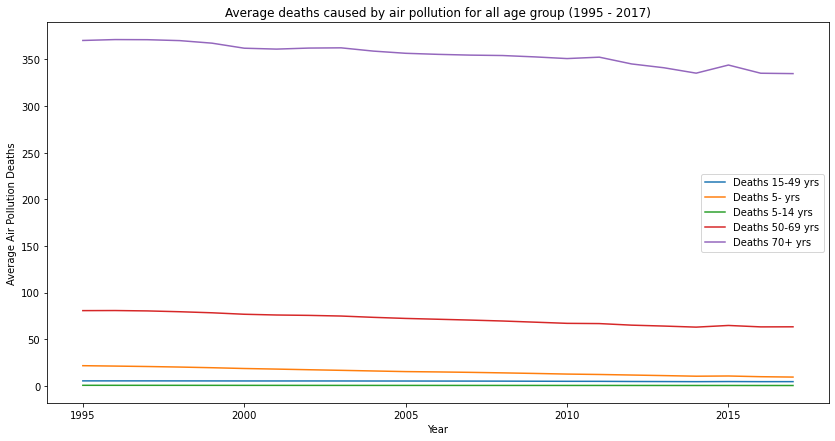

In [306]:
pd.pivot_table(air_pollution,index=['Year'],values=['Deaths 5- yrs', 
                                                    'Deaths 5-14 yrs', 
                                                    'Deaths 15-49 yrs',
                                                    'Deaths 50-69 yrs', 
                                                    'Deaths 70+ yrs'],aggfunc=np.mean).plot(figsize=(14,7))
plt.title('Average deaths caused by air pollution for all age group (1995 - 2017)')
plt.xlabel('Year')
plt.ylabel('Average Air Pollution Deaths')
plt.savefig('ap_5_70.png', bbox_inches="tight")

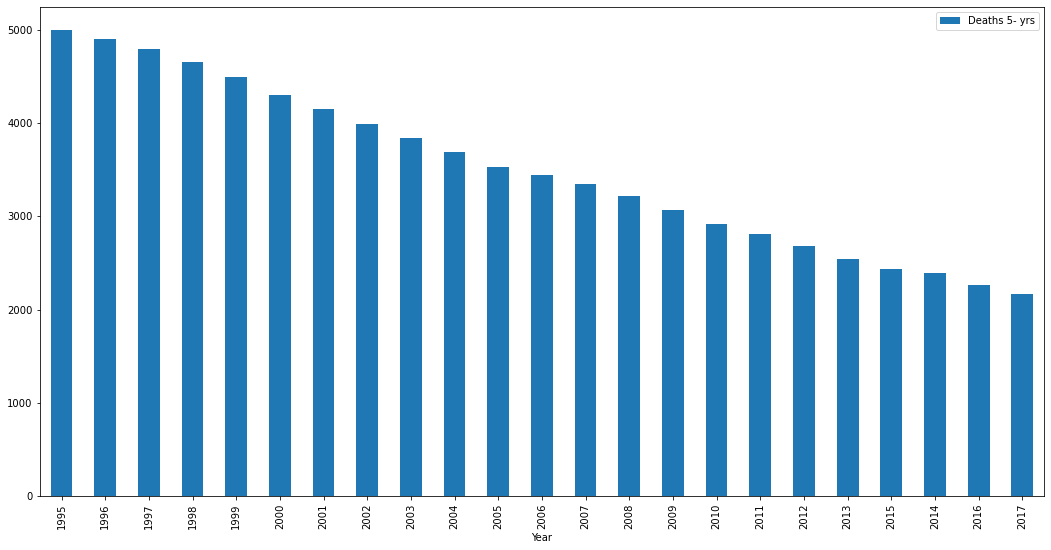

In [251]:
# the total number of deaths for people under 5 yrs of age grouped by year 
air_pollution[['Deaths 5- yrs', 
               'Country', 
               'Year']].groupby(['Year']).sum().sort_values('Deaths 5- yrs', ascending = False).plot.bar(figsize=(18,9))

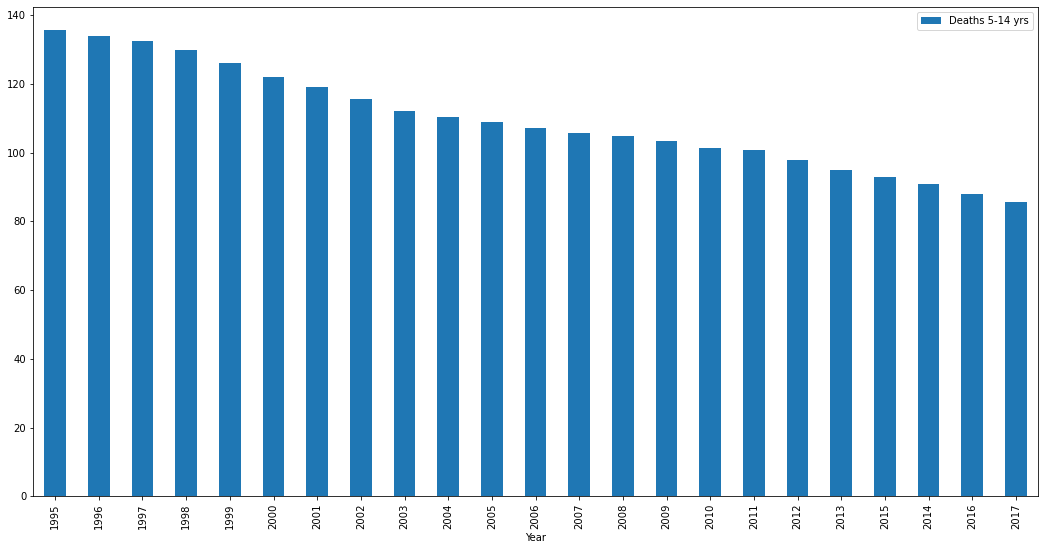

In [36]:
# the total number of deaths for people of 5 to 14 yrs of age grouped by year 
air_pollution[['Deaths 5-14 yrs', 
               'Country', 
               'Year']].groupby(['Year']).sum().sort_values('Deaths 5-14 yrs', ascending = False).plot.bar(figsize=(18,9))

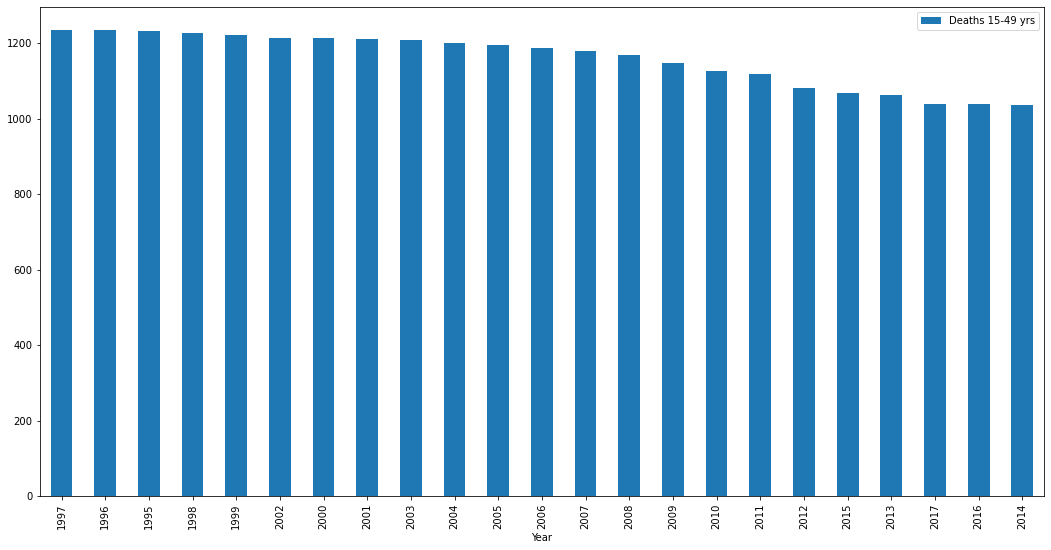

In [37]:
# the total number of deaths for people of 15 to 49 yrs of age grouped by year 
air_pollution[['Deaths 15-49 yrs', 
               'Country', 
               'Year']].groupby(['Year']).sum().sort_values('Deaths 15-49 yrs', ascending = False).plot.bar(figsize=(18,9))

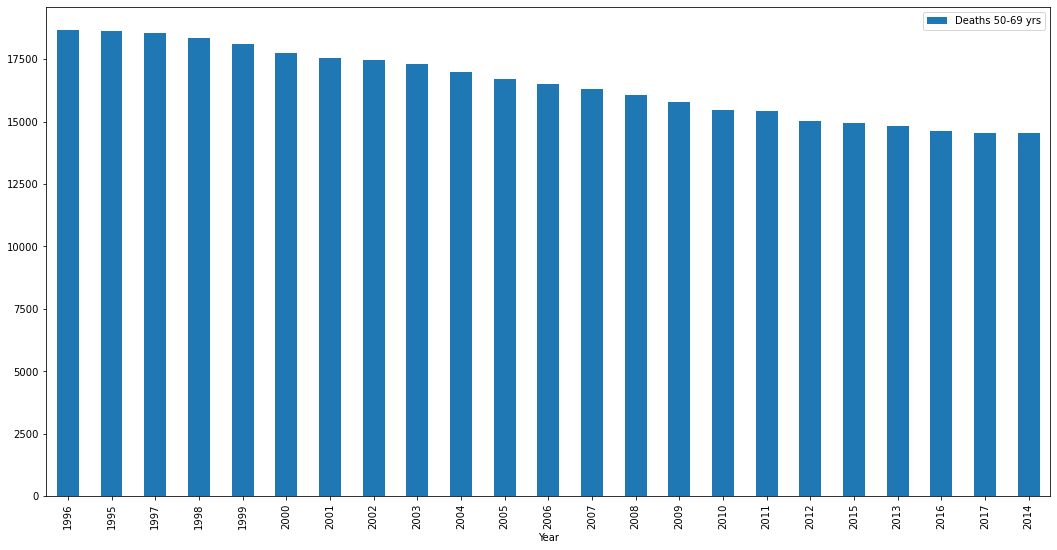

In [38]:
# the total number of deaths for people of 50 to 69 yrs of age grouped by year 
air_pollution[['Deaths 50-69 yrs', 
               'Country', 
               'Year']].groupby(['Year']).sum().sort_values('Deaths 50-69 yrs', ascending = False).plot.bar(figsize=(18,9))

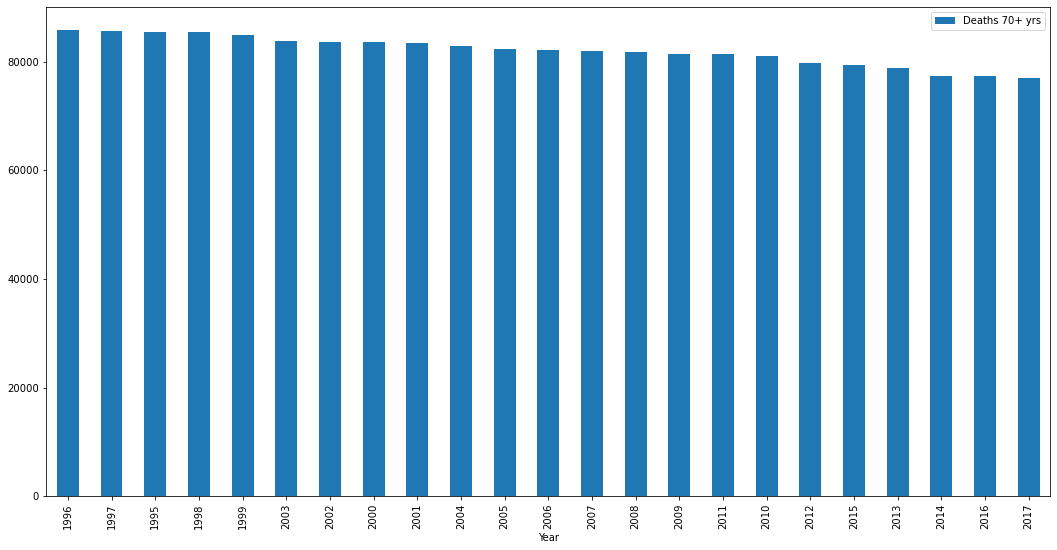

In [39]:
# the total number of deaths for people oveer 70 yrs of age grouped by year 
air_pollution[['Deaths 70+ yrs', 
               'Country', 
               'Year']].groupby(['Year']).sum().sort_values('Deaths 70+ yrs', ascending = False).plot.bar(figsize=(18,9))

In [40]:
air_pollution.head()

,Country,Year,Deaths 5- yrs,Deaths 5-14 yrs,Deaths 15-49 yrs,Deaths 50-69 yrs,Deaths 70+ yrs
5,Afghanistan,1995,73.72,1.06,5.71,108.56,344.07
6,Afghanistan,1996,68.73,1.03,5.74,109.31,345.10
7,Afghanistan,1997,65.57,1.02,5.86,110.34,346.52
8,Afghanistan,1998,61.70,0.99,5.91,109.56,341.70
9,Afghanistan,1999,61.14,0.98,6.29,111.00,343.64


In [41]:
# adding the deaths to get the total number deaths for each year and country
air_pollution['Total Deaths'] = air_pollution['Deaths 5- yrs'] + air_pollution['Deaths 5-14 yrs'] + air_pollution['Deaths 15-49 yrs'] + air_pollution['Deaths 50-69 yrs'] + air_pollution['Deaths 70+ yrs']

In [42]:
air_pollution.head()

,Country,Year,Deaths 5- yrs,Deaths 5-14 yrs,Deaths 15-49 yrs,Deaths 50-69 yrs,Deaths 70+ yrs,Total Deaths
5,Afghanistan,1995,73.72,1.06,5.71,108.56,344.07,533.12
6,Afghanistan,1996,68.73,1.03,5.74,109.31,345.10,529.91
7,Afghanistan,1997,65.57,1.02,5.86,110.34,346.52,529.31
8,Afghanistan,1998,61.70,0.99,5.91,109.56,341.70,519.86
9,Afghanistan,1999,61.14,0.98,6.29,111.00,343.64,523.05


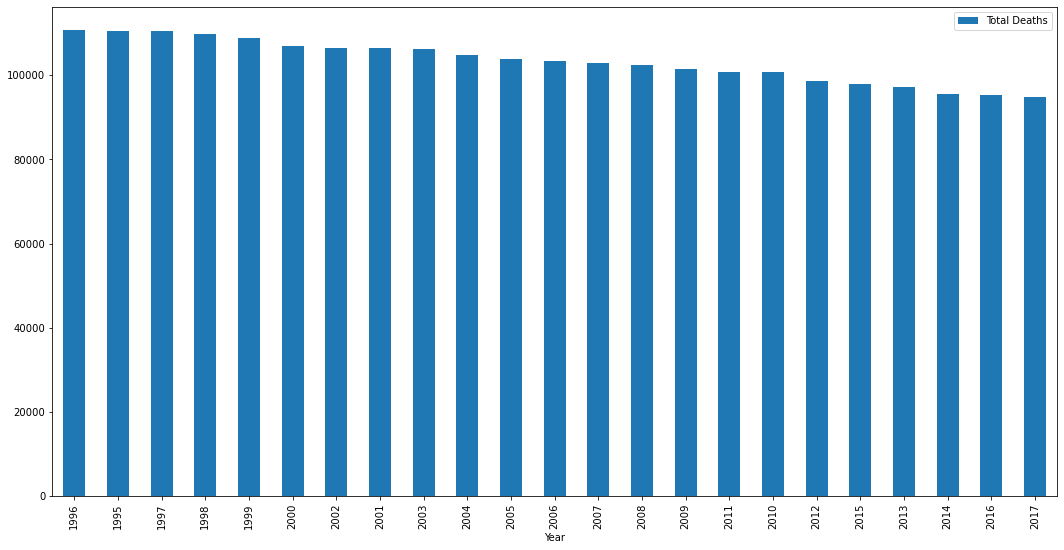

In [44]:
# displaying the total number of deaths by year from 1995 to 2017
air_pollution[['Total Deaths', 
               'Country', 
               'Year']].groupby(['Year']).sum().sort_values('Total Deaths', ascending = False).plot.bar(figsize=(18,9))

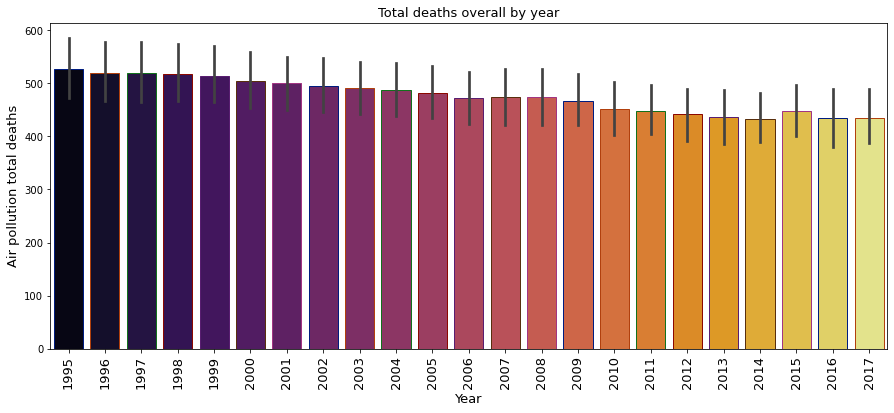

In [300]:
plt.subplots(figsize=(15,6))
sns.barplot(x='Year',y='Total Deaths',data=data_merge_df,palette='inferno',edgecolor=sns.color_palette('dark',7))
plt.ylabel('Air pollution total deaths', fontsize=13)
plt.xticks(rotation=90,fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.title('Total deaths overall by year', fontsize=13)
plt.savefig('avgtotaldeaths.png', bbox_inches="tight")

In [45]:
air_pollution.head()

,Country,Year,Deaths 5- yrs,Deaths 5-14 yrs,Deaths 15-49 yrs,Deaths 50-69 yrs,Deaths 70+ yrs,Total Deaths
5,Afghanistan,1995,73.72,1.06,5.71,108.56,344.07,533.12
6,Afghanistan,1996,68.73,1.03,5.74,109.31,345.10,529.91
7,Afghanistan,1997,65.57,1.02,5.86,110.34,346.52,529.31
8,Afghanistan,1998,61.70,0.99,5.91,109.56,341.70,519.86
9,Afghanistan,1999,61.14,0.98,6.29,111.00,343.64,523.05


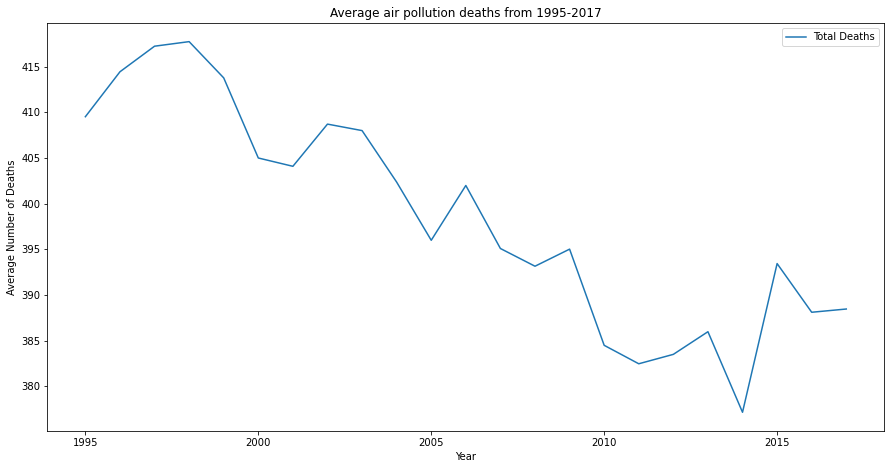

In [301]:
# Average air pollution deaths from 1995-2017
air_pollution[['Year','Total Deaths']].groupby(["Year"]).median().sort_values(by='Year',ascending=False).plot(figsize=(15,7.5))
plt.title("Average air pollution deaths from 1995-2017")
plt.xlabel("Year")
plt.ylabel("Average Number of Deaths")
plt.savefig('avgtotaldeathslineplot.png', bbox_inches="tight")

In [ ]:
# Merged data set starts here:

In [256]:
# merging the two data sets together using pandas
pd.merge(climate_data, air_pollution)

,Region,Country,City,Month,Day,Year,AvgTemperature,Deaths 5- yrs,Deaths 5-14 yrs,Deaths 15-49 yrs,Deaths 50-69 yrs,Deaths 70+ yrs,Total Deaths
0,Africa,Algeria,Algiers,1,1,1995,64.2,17.68,0.91,8.62,108.48,514.12,649.81
1,Africa,Algeria,Algiers,1,2,1995,49.4,17.68,0.91,8.62,108.48,514.12,649.81
2,Africa,Algeria,Algiers,1,3,1995,48.8,17.68,0.91,8.62,108.48,514.12,649.81
3,Africa,Algeria,Algiers,1,4,1995,46.4,17.68,0.91,8.62,108.48,514.12,649.81
4,Africa,Algeria,Algiers,1,5,1995,47.9,17.68,0.91,8.62,108.48,514.12,649.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
858853,Middle East,Lebanon,Beirut,12,31,2017,60.2,1.21,0.11,6.91,92.42,518.00,618.65
858854,Middle East,Oman,Muscat,4,19,1995,82.8,7.08,0.54,7.86,138.86,576.66,731.00
858855,Middle East,Oman,Muscat,9,24,1995,94.5,7.08,0.54,7.86,138.86,576.66,731.00
858856,Middle East,Oman,Muscat,9,25,1995,92.6,7.08,0.54,7.86,138.86,576.66,731.00


In [257]:
# creating a new dataframe to store the merged the datasets
data_merge = pd.merge(climate_data, air_pollution)

In [258]:
# checking what the dataset looks now 
data_merge

,Region,Country,City,Month,Day,Year,AvgTemperature,Deaths 5- yrs,Deaths 5-14 yrs,Deaths 15-49 yrs,Deaths 50-69 yrs,Deaths 70+ yrs,Total Deaths
0,Africa,Algeria,Algiers,1,1,1995,64.2,17.68,0.91,8.62,108.48,514.12,649.81
1,Africa,Algeria,Algiers,1,2,1995,49.4,17.68,0.91,8.62,108.48,514.12,649.81
2,Africa,Algeria,Algiers,1,3,1995,48.8,17.68,0.91,8.62,108.48,514.12,649.81
3,Africa,Algeria,Algiers,1,4,1995,46.4,17.68,0.91,8.62,108.48,514.12,649.81
4,Africa,Algeria,Algiers,1,5,1995,47.9,17.68,0.91,8.62,108.48,514.12,649.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
858853,Middle East,Lebanon,Beirut,12,31,2017,60.2,1.21,0.11,6.91,92.42,518.00,618.65
858854,Middle East,Oman,Muscat,4,19,1995,82.8,7.08,0.54,7.86,138.86,576.66,731.00
858855,Middle East,Oman,Muscat,9,24,1995,94.5,7.08,0.54,7.86,138.86,576.66,731.00
858856,Middle East,Oman,Muscat,9,25,1995,92.6,7.08,0.54,7.86,138.86,576.66,731.00


In [259]:
# checking for null values that could have been overwritten during the merge
data_merge.isnull().sum()

Region              0
Country             0
City                0
Month               0
Day                 0
Year                0
AvgTemperature      0
Deaths 5- yrs       0
Deaths 5-14 yrs     0
Deaths 15-49 yrs    0
Deaths 50-69 yrs    0
Deaths 70+ yrs      0
Total Deaths        0
dtype: int64

In [260]:
# checking the values in the tail of the set
data_merge.tail()

,Region,Country,City,Month,Day,Year,AvgTemperature,Deaths 5- yrs,Deaths 5-14 yrs,Deaths 15-49 yrs,Deaths 50-69 yrs,Deaths 70+ yrs,Total Deaths
858853,Middle East,Lebanon,Beirut,12,31,2017,60.2,1.21,0.11,6.91,92.42,518.00,618.65
858854,Middle East,Oman,Muscat,4,19,1995,82.8,7.08,0.54,7.86,138.86,576.66,731.00
858855,Middle East,Oman,Muscat,9,24,1995,94.5,7.08,0.54,7.86,138.86,576.66,731.00
858856,Middle East,Oman,Muscat,9,25,1995,92.6,7.08,0.54,7.86,138.86,576.66,731.00
858857,Middle East,Oman,Muscat,10,1,1995,93.1,7.08,0.54,7.86,138.86,576.66,731.00


In [261]:
del data_merge['City']

In [262]:
data_merge.head()

,Region,Country,Month,Day,Year,AvgTemperature,Deaths 5- yrs,Deaths 5-14 yrs,Deaths 15-49 yrs,Deaths 50-69 yrs,Deaths 70+ yrs,Total Deaths
0,Africa,Algeria,1,1,1995,64.2,17.68,0.91,8.62,108.48,514.12,649.81
1,Africa,Algeria,1,2,1995,49.4,17.68,0.91,8.62,108.48,514.12,649.81
2,Africa,Algeria,1,3,1995,48.8,17.68,0.91,8.62,108.48,514.12,649.81
3,Africa,Algeria,1,4,1995,46.4,17.68,0.91,8.62,108.48,514.12,649.81
4,Africa,Algeria,1,5,1995,47.9,17.68,0.91,8.62,108.48,514.12,649.81


In [263]:
del data_merge['Day']

In [264]:
del data_merge['Month']

In [265]:
data_merge.head()

,Region,Country,Year,AvgTemperature,Deaths 5- yrs,Deaths 5-14 yrs,Deaths 15-49 yrs,Deaths 50-69 yrs,Deaths 70+ yrs,Total Deaths
0,Africa,Algeria,1995,64.2,17.68,0.91,8.62,108.48,514.12,649.81
1,Africa,Algeria,1995,49.4,17.68,0.91,8.62,108.48,514.12,649.81
2,Africa,Algeria,1995,48.8,17.68,0.91,8.62,108.48,514.12,649.81
3,Africa,Algeria,1995,46.4,17.68,0.91,8.62,108.48,514.12,649.81
4,Africa,Algeria,1995,47.9,17.68,0.91,8.62,108.48,514.12,649.81


In [266]:
data_merge.head()

,Region,Country,Year,AvgTemperature,Deaths 5- yrs,Deaths 5-14 yrs,Deaths 15-49 yrs,Deaths 50-69 yrs,Deaths 70+ yrs,Total Deaths
0,Africa,Algeria,1995,64.2,17.68,0.91,8.62,108.48,514.12,649.81
1,Africa,Algeria,1995,49.4,17.68,0.91,8.62,108.48,514.12,649.81
2,Africa,Algeria,1995,48.8,17.68,0.91,8.62,108.48,514.12,649.81
3,Africa,Algeria,1995,46.4,17.68,0.91,8.62,108.48,514.12,649.81
4,Africa,Algeria,1995,47.9,17.68,0.91,8.62,108.48,514.12,649.81


In [267]:
# getting the average temperature for each year
data_merge_df = data_merge.groupby(['Region', 'Country', 'Year', 'Total Deaths'],as_index=False).agg({'AvgTemperature':np.mean})

In [268]:
data_merge_df.head(50)

,Region,Country,Year,Total Deaths,AvgTemperature
0,Africa,Algeria,1995,649.81,64.410468
1,Africa,Algeria,1996,656.22,63.530220
2,Africa,Algeria,1997,656.86,64.926301
3,Africa,Algeria,1998,652.50,63.619668
4,Africa,Algeria,1999,651.81,64.923626
5,Africa,Algeria,2000,642.49,64.182787
6,Africa,Algeria,2001,639.78,64.669863
7,Africa,Algeria,2002,632.33,64.135457
8,Africa,Algeria,2003,628.49,65.493407
9,Africa,Algeria,2004,614.12,64.087432


In [269]:
data_merge_df

,Region,Country,Year,Total Deaths,AvgTemperature
0,Africa,Algeria,1995,649.81,64.410468
1,Africa,Algeria,1996,656.22,63.530220
2,Africa,Algeria,1997,656.86,64.926301
3,Africa,Algeria,1998,652.50,63.619668
4,Africa,Algeria,1999,651.81,64.923626
...,...,...,...,...,...
1920,Middle East,Lebanon,2014,630.36,71.217033
1921,Middle East,Lebanon,2015,631.86,70.976648
1922,Middle East,Lebanon,2016,621.82,71.407735
1923,Middle East,Lebanon,2017,618.65,70.942424


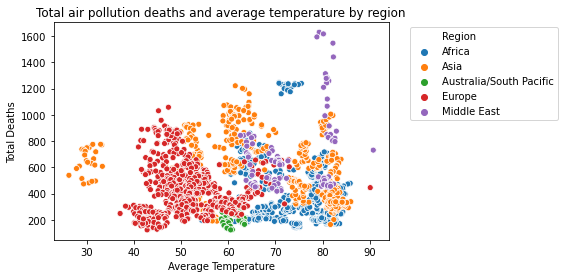

In [307]:
#showing the total air pollution deaths and average temperature by region
data_avg = sns.scatterplot(x=data_merge_df['AvgTemperature'], y=data_merge_df['Total Deaths'], hue=data_merge_df['Region'])

data_avg = plt.plot(figsize=(20,10))
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Total air pollution deaths and average temperature by region')
plt.xlabel('Average Temperature')
plt.ylabel('Total Deaths')
plt.savefig('ap_at.png', bbox_inches="tight")

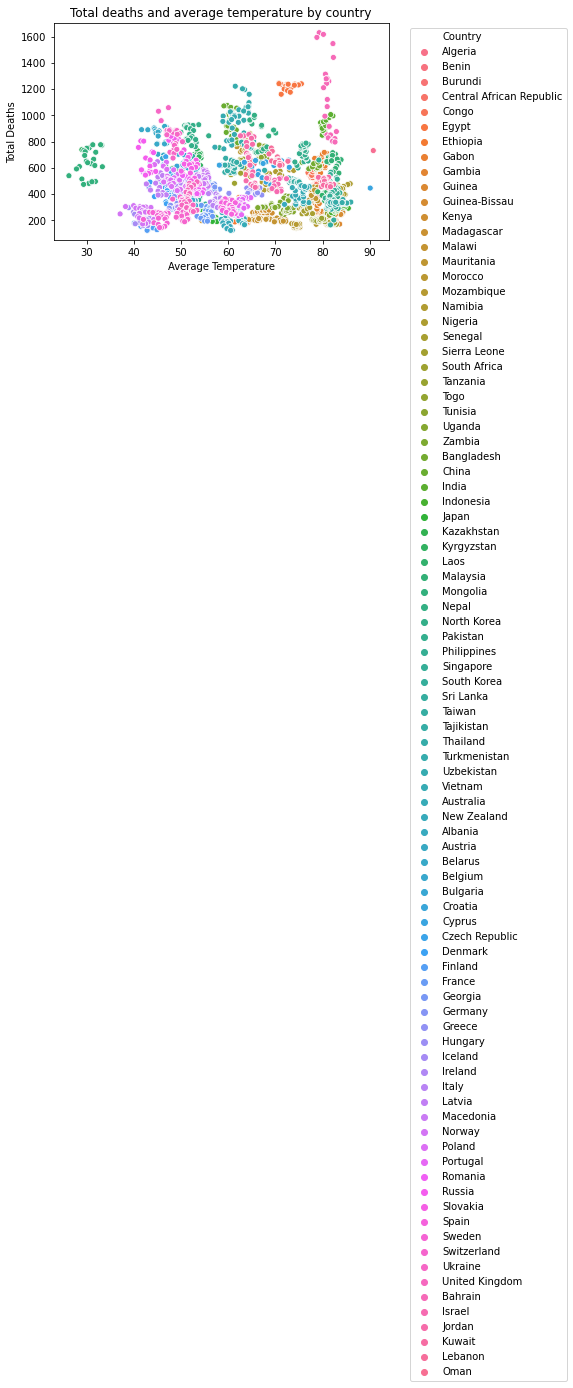

In [277]:
#showing the total air pollution deaths and average temperature by country
data_avg = sns.scatterplot(x=data_merge_df['AvgTemperature'], y=data_merge_df['Total Deaths'], hue=data_merge_df['Country'])

data_avg= plt.plot(figsize=(20,10))
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Total deaths and average temperature by country')
plt.xlabel('Average Temperature')
plt.ylabel('Total Deaths')
plt.savefig('scatterplot_country.jpg', bbox_inches="tight")